In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
from scipy.stats import norm

In [2]:
df = pd.read_csv (r'tracks_file.csv',sep='\t')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13672 entries, 0 to 13671
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   album                1534 non-null   object 
 1   artwork_url          11641 non-null  object 
 2   caption              671 non-null    object 
 3   comment_count        13243 non-null  float64
 4   commentable          13672 non-null  bool   
 5   comments             9140 non-null   object 
 6   created_at           13672 non-null  object 
 7   description          8455 non-null   object 
 8   display_date         13672 non-null  object 
 9   download_count       13372 non-null  float64
 10  downloadable         13672 non-null  bool   
 11  duration             13672 non-null  int64  
 12  embeddable_by        13672 non-null  object 
 13  full_duration        13672 non-null  int64  
 14  genre                10217 non-null  object 
 15  has_downloads_left   13672 non-null 

In [28]:
genre = dict(df['genre'].value_counts())

keys=[]
values =[]
for key,value in genre.items():
    keys.append(key)
    values.append(value)

df_genre = pd.DataFrame(list(zip(keys,values)),columns=['Genre','Frequency'])
df_genre

,Genre,Frequency
0,Pop,311
1,Country,291
2,Hip-hop & Rap,264
3,Dance & EDM,260
4,Electronic,239
...,...,...
2205,Nonfiction,1
2206,death metal,1
2207,Intrumental,1
2208,DATADAM,1


In [29]:
df['genre'].hist(bins=100)

<AxesSubplot:>

C:\Users\uyen Trang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35299 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\uyen Trang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38626 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\uyen Trang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\uyen Trang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\uyen Trang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3638 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\uyen Trang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning

C:\Users\uyen Trang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\uyen Trang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13653 missing from current font.
  font.set_text(s, 0, flags=flags)


Error in callback <function flush_figures at 0x0000023C0D5E1A60> (for post_execute):


KeyboardInterrupt: 

In [22]:
df.loc[df['genre']=='Pop']

,album,artwork_url,caption,comment_count,commentable,comments,created_at,description,display_date,download_count,...,streamable,tag_list,title,track_authorization,track_format,uri,urn,user,user_id,waveform_url
52,NaN,https://i1.sndcdn.com/artworks-vp3QmqK7aD8c-0-...,NaN,2118.0,True,"1038088576,737890048,249569792,153199228,10375...",2021-09-28T21:01:05Z,NaN,2021-09-24T00:00:00Z,0.0,...,True,NaN,"NEIKED, Mae Muller, Polo G - Better Days",eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1132658965,soundcloud:tracks:1132658965,166394682,166394682,https://wave.sndcdn.com/xbi4J0pA3ztm_m.json
84,NaN,https://i1.sndcdn.com/artworks-UQkyMQWCVhx9L2V...,NaN,24.0,True,"894545797,986396038,24979606,1024363681,663698...",2021-07-10T18:53:05Z,"🎵 TINI, Maria Becerra - Miénteme (Letra/Lyrics...",2021-07-10T18:53:05Z,0.0,...,True,"mienteme, mienteme letra, letra lyrics, lyrics...","TINI, Maria Becerra - Miénteme",eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1085276572,soundcloud:tracks:1085276572,1006343701,1006343701,https://wave.sndcdn.com/GvcFi8cHbZ4E_m.json
99,NaN,https://i1.sndcdn.com/artworks-6gtlA1VxoUmT-0-...,NaN,8204.0,True,"707761159,1035282451,214760982,1000408087,1040...",2014-01-10T05:24:19Z,"""Am I Wrong"" by Nico & Vinz from their forthco...",2014-01-21T00:00:00Z,0.0,...,True,NaN,Am I Wrong,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/128778707,soundcloud:tracks:128778707,70222524,70222524,https://wave.sndcdn.com/uZADRwFXFc5y_m.json
145,NaN,https://i1.sndcdn.com/artworks-000149792384-og...,NaN,37.0,True,"82907781,339472390,662526987,840415501,6488245...",2016-03-02T13:39:46Z,Don't Dwell releases May 13th via Paper Trail ...,2016-03-03T16:53:42Z,0.0,...,True,"""Star Parks"" ""Indie Pop"" ""Indie Rock""",Star Parks - Theoretical Girls,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/249823896,soundcloud:tracks:249823896,133862385,133862385,https://wave.sndcdn.com/KM9DBoks3QOp_m.json
158,NaN,https://i1.sndcdn.com/artworks-gO3pP7P97hKe-0-...,NaN,4567.0,True,"1047362944,1038108298,1008260875,1050725137,10...",2018-01-24T22:28:44Z,NaN,2018-02-02T00:00:00Z,0.0,...,True,NaN,Dinero,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/388629165,soundcloud:tracks:388629165,27899020,27899020,https://wave.sndcdn.com/o2z5Z0IPHTVb_m.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546,NaN,https://i1.sndcdn.com/artworks-000201676787-lu...,NaN,1.0,True,787382341,2017-01-07T18:23:28Z,Hey guys we are Roger and Sam. We mashup heath...,2017-01-07T18:23:28Z,0.0,...,True,heathens suckerforpain twentyonepilots lilwayn...,Heathens/Sucker for pain Mashup by Twentyonepi...,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/301405911,soundcloud:tracks:301405911,279965973,279965973,https://wave.sndcdn.com/p2fISLHDxJdg_m.json
13561,NaN,https://i1.sndcdn.com/artworks-000066237823-gm...,NaN,2.0,True,145228118,2013-12-02T14:34:48Z,NaN,2013-12-02T14:34:48Z,0.0,...,True,"Gyan ""Radio Active"" Cover ""Imagine Dragon"" Gya...",Gyan - Radio Active ( Imagine Dragon Cover ),eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/122873602,soundcloud:tracks:122873602,48356021,48356021,https://wave.sndcdn.com/YAE3F3Lp2gCp_m.json
13622,NaN,NaN,NaN,2.0,True,25929013,2016-03-15T17:52:37Z,NaN,2016-03-15T17:52:37Z,0.0,...,True,Imagine Dragon Radioactive Cover,Imagine Dragon - Radioactive (Cover Ft Dominika),eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/252022671,soundcloud:tracks:252022671,117584042,117584042,https://wave.sndcdn.com/qhf4ugsoGD03_m.json
13633,NaN,NaN,NaN,0.0,True,NaN,2014-10-02T10:06:25Z,NaN,2014-10-02T10:06:25Z,100.0,...,True,soundcloud:so

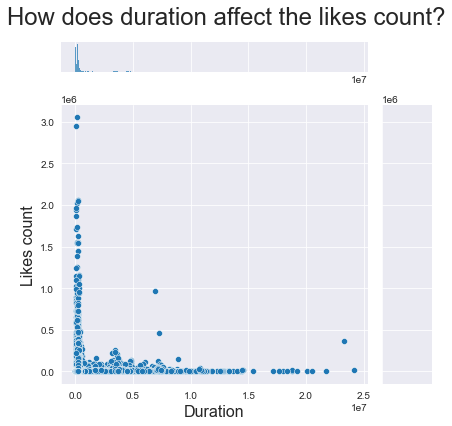

In [3]:
# Plot the jointplot
sns.set_style('darkgrid');
p = sns.jointplot(x='duration',y='likes_count',data=df)

# JointGrid has a convenience function
p.set_axis_labels('Duration', 'Likes count', fontsize=16)
  
# Set title for plot
p.fig.suptitle( "How does duration affect the likes count?" , size = 24 )
  
# Display figure
plt.tight_layout()

In [36]:
df = pd.read_csv (r'users_file.csv',sep='\t')

In [37]:
df

,avatar_url,city,comments_count,country_code,created_at,description,first_name,followers,followers_count,followings,...,station_urn,track_count,uri,urn,user_albums,user_playlist_without_albums,user_top_tracks,user_tracks,username,verified
0,https://i1.sndcdn.com/avatars-000723723973-qtb...,NaN,0,FR,2016-10-12T22:04:43Z,NaN,NaN,235133933,3,"138934049,605567652,235133933,261197982,604286",...,soundcloud:system-playlists:artist-stations:26...,0,https://api.soundcloud.com/users/261128192,soundcloud:users:261128192,NaN,"314247842,593639301,321596631,266859227,296074...",NaN,NaN,adèle,False
1,https://i1.sndcdn.com/avatars-000507859965-mpc...,NaN,0,NaN,2017-10-16T15:41:53Z,NaN,NaN,NaN,0,"141687168,5603465,21113102,96841112,14830753,3...",...,soundcloud:system-playlists:artist-stations:33...,0,https://api.soundcloud.com/users/338315266,soundcloud:users:338315266,NaN,NaN,NaN,NaN,adele,False
2,https://i1.sndcdn.com/avatars-000270857665-bnc...,NaN,0,NaN,2016-05-18T09:17:14Z,NaN,NaN,NaN,3,267075468,...,soundcloud:system-playlists:artist-stations:22...,0,https://api.soundcloud.com/users/227758087,soundcloud:users:227758087,NaN,327168347,NaN,NaN,Adele,False
3,https://i1.sndcdn.com/avatars-000242997710-jw1...,NaN,0,NaN,2016-07-30T15:12:11Z,NaN,Adele,"459549,244431741",6,NaN,...,soundcloud:system-playlists:artist-stations:24...,0,https://api.soundcloud.com/users/244316169,soundcloud:users:244316169,NaN,NaN,NaN,NaN,Adele,False
4,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2021-09-12T23:53:30Z,NaN,Аделина,NaN,0,NaN,...,soundcloud:system-playlists:artist-stations:10...,0,https://api.soundcloud.com/users/1029605386,soundcloud:users:1029605386,NaN,NaN,NaN,NaN,Adele,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,https://i1.sndcdn.com/avatars-001049708419-ld1...,NaN,0,NaN,2021-08-11T10:02:50Z,NaN,Siddharth,NaN,0,NaN,...,soundcloud:system-playlists:artist-stations:10...,0,https://api.soundcloud.com/users/1017825766,soundcloud:users:1017825766,NaN,NaN,NaN,NaN,Imagine Dragon,False
3071,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2019-12-02T22:02:45Z,NaN,NaN,NaN,1,NaN,...,soundcloud:system-playlists:artist-stations:74...,0,https://api.soundcloud.com/users/743142379,soundcloud:users:743142379,NaN,NaN,NaN,NaN,imagine dragon,False
3072,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2013-06-05T20:02:23Z,NaN,NaN,54274065,1,NaN,...,soundcloud:system-playlists:artist-stations:47...,0,https://api.soundcloud.com/users/47083503,soundcloud:users:47083503,NaN,NaN,NaN,NaN,imaginedragon_mus,False
3073,https://i1.sndcdn.com/avatars-000126195889-fqk...,NaN,0,NaN,2015-01-19T22:14:43Z,NaN,NaN,"339069036,116946423",2,"1807424,1078690,1301673,1546189,1722899,114782...",...,soundcloud:system-playlists:artist-stations:13...,0,https://api.soundcloud.com/users/133948403,soundcloud:users:133948403,NaN,954351964,NaN,NaN,imagine12dragon,False


/home/uyen_trang/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/uyen_trang/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


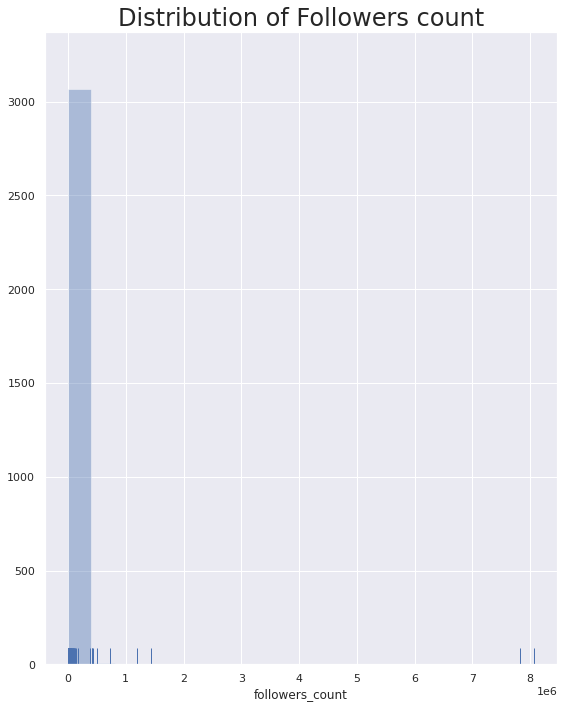

In [17]:
sns.set_style('darkgrid');
sns.distplot(df.followers_count, bins=20, kde=False, rug=True,label = 'Distribution of Followers count');

# Set title for plot
plt.title( "Distribution of Followers count" , size = 24 ) 
# Display figure
plt.tight_layout()

<AxesSubplot:xlabel='followers_count', ylabel='Density'>

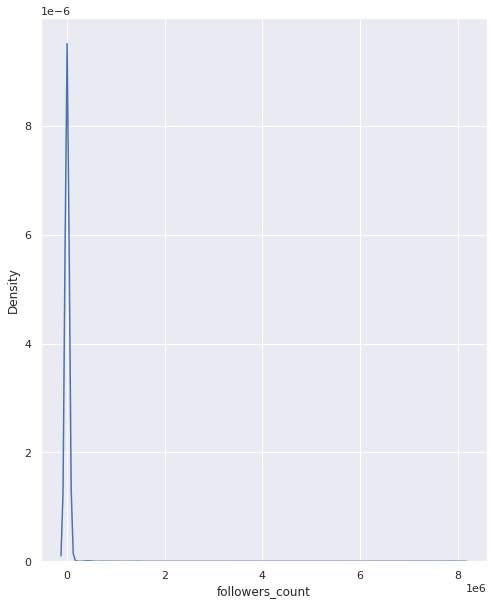

In [18]:
sns.set_style('darkgrid');
sns.kdeplot(data=df,x = 'followers_count')

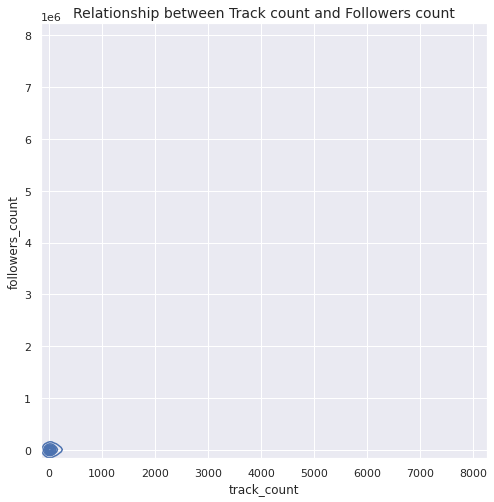

In [38]:
ax = sns.kdeplot(data=df,x = 'track_count',y = 'followers_count')
ax.set_title("Relationship between Track count and Followers count",size = 14);


In [3]:
df = pd.read_csv (r'playlists_file.csv',sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artwork_url       2691 non-null   object 
 1   created_at        7013 non-null   object 
 2   description       1610 non-null   object 
 3   display_date      7013 non-null   object 
 4   duration          7013 non-null   int64  
 5   embeddable_by     7013 non-null   object 
 6   genre             2768 non-null   object 
 7   id                7013 non-null   int64  
 8   is_album          7013 non-null   bool   
 9   kind              7013 non-null   object 
 10  label_name        482 non-null    object 
 11  last_modified     7013 non-null   object 
 12  license           7013 non-null   object 
 13  likers            3610 non-null   object 
 14  likes_count       7013 non-null   int64  
 15  managed_by_feeds  7013 non-null   bool   
 16  permalink         7013 non-null   object 


In [5]:
df_corr = df[['duration','likes_count','reposts_count','track_count']]

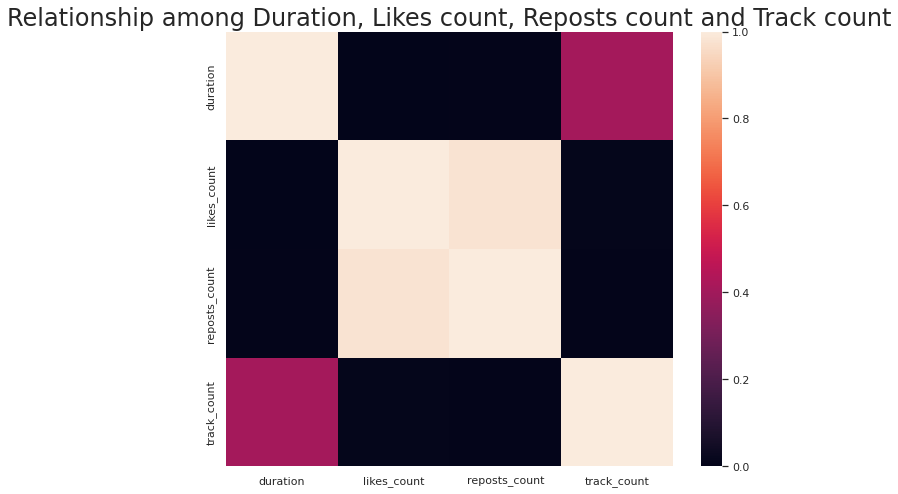

In [11]:
sns.heatmap(df_corr.corr())
sns.set(rc={'figure.figsize':(8,10)})
plt.title("Relationship among Duration, Likes count, Reposts count and Track count",size = 24)
plt.show()

<AxesSubplot:xlabel='duration', ylabel='Density'>

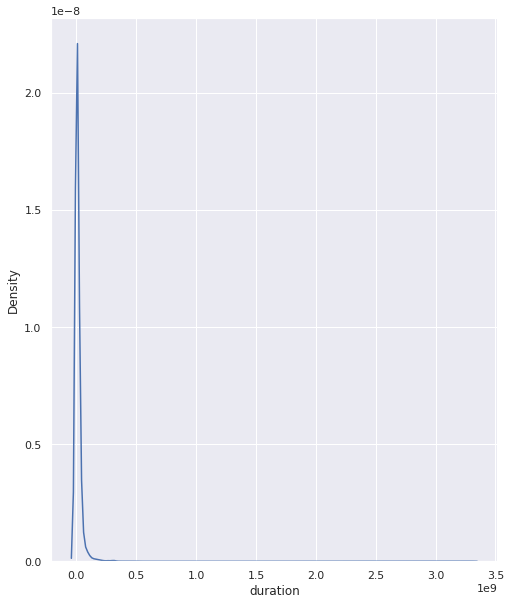

In [13]:
sns.kdeplot(data=df_corr,x= 'duration')